# Pytorch Loss

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


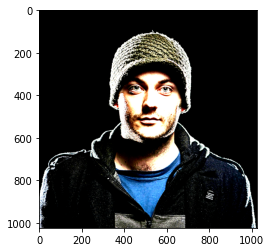

In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

# read image into memory
image_path = '/workspace/lecture_code_blocks/assets/sample_image.jpg'
m_img = torchvision.io.read_image(image_path).float()

# compute the mean and standard deviation
mean, std = m_img.mean(), m_img.std()

# normalise our images from 0-255 to 0-1
normalise = torchvision.transforms.Normalize(mean, std)
normalised_image = normalise(m_img)

# plot normalised image
plt.imshow(normalised_image.permute(1, 2, 0))

In [2]:
loss_fn = torch.nn.MSELoss()
loss_fn(normalised_image, normalised_image)
# >>> tensor(0.)

tensor(0.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


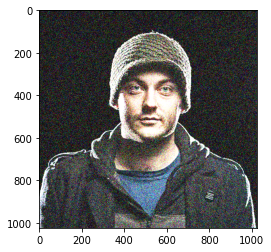

In [3]:
# add some noise
noise_level = 0.9
noised_image = normalised_image + torch.randn(normalised_image.size()) * noise_level

# plot normalised image
plt.imshow(noised_image.permute(1, 2, 0))

In [8]:
loss_fn = torch.nn.MSELoss()
loss_fn(noised_image, normalised_image)
# >>> tensor(0.8087)

tensor(0.8087)

# Custom Loss

## loss by fuction

In [7]:
def custom_mse_loss(input, target):
    difference = input - target
    squared_difference = torch.square(difference)
    loss = torch.mean(squared_difference)
    return loss

custom_mse_loss(noised_image, normalised_image)
# >>> tensor(0.8087)

## Loss by class

In [10]:
class CustomMSELoss(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
    def forward(self, input, target):
        return torch.mean(torch.square(input - target))

custom_mse_loss = CustomMSELoss()
custom_mse_loss(noised_image, normalised_image)
# >>> tensor(0.8087)

tensor(0.8087)

Test